In [ ]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10, return_X_y=False)
n_classes = len(np.unique(digits.target))
print("nombre de classes : ",n_classes)
print(digits.DESCR)


nombre de classes :  10
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels

In [ ]:
print (digits.data.shape)

(1797, 64)


64=8x8x1-----> On l'utilisera apres

<Figure size 432x288 with 0 Axes>

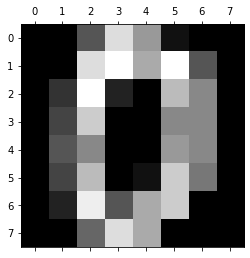

In [ ]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.3)

In [ ]:
print('Training data shape: ', X_train.shape)
print('Testing data shape : ', X_test.shape)

Training data shape:  (1257, 64)
Testing data shape :  (540, 64)


--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------
k==> 1


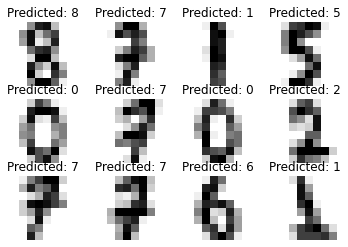

--- Temps d'execution :  0.7041308879852295 seconds ---
Precision score: [1.         0.96610169 1.         0.96610169 0.98305085 1.
 0.98245614 1.         0.95652174 0.96078431]
Recall score: [1.         1.         0.97674419 1.         1.         0.96226415
 1.         1.         0.93617021 0.9245283 ]
--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------
k==> 3


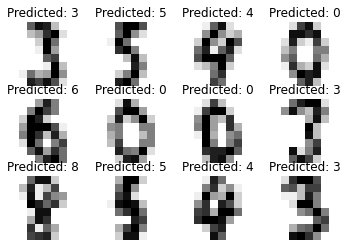

--- Temps d'execution :  0.5447695255279541 seconds ---
Precision score: [1.         0.98275862 1.         1.         0.98305085 0.98076923
 0.98214286 1.         0.93877551 0.98      ]
Recall score: [1.         1.         1.         1.         1.         0.96226415
 0.98214286 1.         0.9787234  0.9245283 ]
--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------
k==> 5


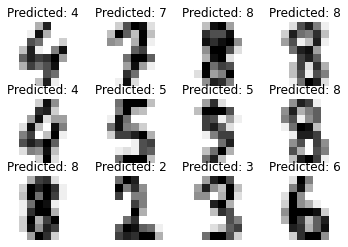

--- Temps d'execution :  0.6640253067016602 seconds ---
Precision score: [1.         0.98275862 1.         0.98245614 0.98305085 0.98113208
 0.98214286 0.96721311 0.93617021 0.98      ]
Recall score: [1.         1.         0.97674419 0.98245614 1.         0.98113208
 0.98214286 1.         0.93617021 0.9245283 ]
--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------
k==> 7


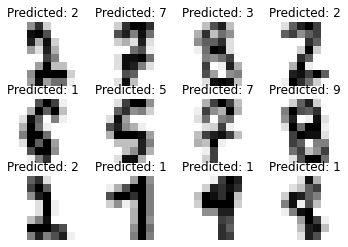

--- Temps d'execution :  0.5614874362945557 seconds ---
Precision score: [1.         0.93442623 1.         0.98245614 0.98305085 0.98076923
 0.98214286 0.96721311 0.95555556 0.96      ]
Recall score: [1.         1.         0.97674419 0.98245614 1.         0.96226415
 0.98214286 1.         0.91489362 0.90566038]
--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------
k==> 9


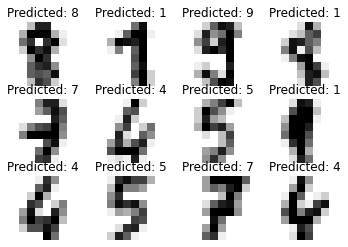

--- Temps d'execution :  0.6787080764770508 seconds ---
Precision score: [1.         0.9047619  0.93333333 0.98214286 0.98305085 0.96226415
 0.98214286 0.96721311 0.975      0.96      ]
Recall score: [1.         1.         0.97674419 0.96491228 1.         0.96226415
 0.98214286 1.         0.82978723 0.90566038]


In [ ]:
from sklearn import neighbors
import time
#Varier le K
for k in range(1, 10, 2):
    start_time = time.time()
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print("--------------------------------------------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------------------------------------------")
    print("k==>",k)
    from sklearn.metrics import recall_score

    #y_true et y_predicted
    y_true,y_pred = y_test,knn.predict(X_test)
    img_rows, img_cols = 8,8 #64=8*8
    images = X_test.reshape((-1,img_rows, img_cols))#Reshape

    # selectionner un echantillon de 12 images au hasard
    select = np.random.randint(images.shape[0], size=12)

    # On affiche les images avec la prédiction associée
    fig,ax = plt.subplots(3,4)

    for index, value in enumerate(select):
        plt.subplot(3,4,index+1)
        plt.axis('off')
        plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
        plt.title('Predicted: {}'.format( y_pred[value]) )

    plt.show()
    #calcul du temps d'execution
    print("--- Temps d'execution :  %s seconds ---" % (time.time() - start_time))
    #calcul de la precision et du rappel
    from sklearn.metrics import recall_score, precision_score
    print("Precision score: {}".format(precision_score(y_true,y_pred,average=None)))
    print("Recall score: {}".format(recall_score(y_true,y_pred,average=None)))
